Author: Naoki Atkins

In this homework assignment, we looked into how Logistic Regression, K-Nearest Neighbors, and Gaussian Naive Bayes algorithms fit each particular dataset. We found that Logistic only fits a straight line decision boundary. KNN is able to match curvy relationships between datapoints but it was computationally expensive. And Gaussian Naive Bayes was able to fit a circular decision boundary. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Question 1

In [2]:
df1 = pd.read_csv("dataset1.csv", names=["x1", "x2", "y"])
df2 = pd.read_csv("dataset2.csv", names=["x1", "x2", "y"])
df3 = pd.read_csv("dataset3.csv", names=["x1", "x2", "y"])

# Question 2

In [3]:
X1 = df1.iloc[:, [0, 1]].values
Y1 = df1.iloc[:, 2].values
X2 = df2.iloc[:, [0, 1]].values
Y2 = df2.iloc[:, 2].values


df1_classifier = LogisticRegression(random_state=0)
df1_classifier.fit(X1, Y1)
print(f'Number 2, Score for Dataset 1: {df1_classifier.score(X1, Y1)}')

Number 2, Score for Dataset 1: 1.0


With a score of 1.0 our model is perfect

# Question 3

In [4]:
df2_classifier = LogisticRegression(random_state=0)
df2_classifier.fit(X2, Y2)
print(f'Number 3, Score for Dataset 2: {df2_classifier.score(X2, Y2)}')

Number 3, Score for Dataset 2: 0.525


With a score of .58 our model fits above average, and could use improvement

# Question 4

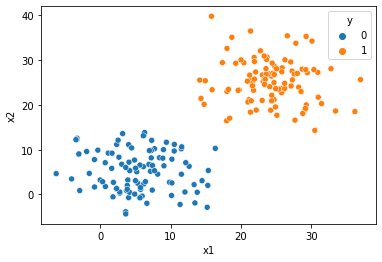

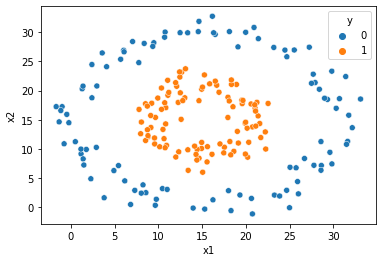

In [5]:
sns.scatterplot(data=df1, x=df1.x1, y=df1.x2, hue="y")
plt.show()
sns.scatterplot(data=df2, x=df2.x1, y=df2.x2, hue="y")
plt.show()

The reason for the decrepancy is that the data in model one is a perfect set of data where all values are <20 are 0, making it very easy for our model to predict. In the second set of data the y values of 0 range for the entirety of the data set making it much more difficult to accurately predict 

# Question 5

In [6]:
df1_GNB = GaussianNB()
df1_GNB.fit(X1, Y1)
print(f'Number 5, score using Gaussian NB for dataset 1: {df1_GNB.score(X1, Y1)}')

df2_GNB = GaussianNB()
df2_GNB.fit(X2, Y2)
print(f'Number 5, score using Gaussian NB for dataset 2: {df2_GNB.score(X2, Y2)}')

Number 5, score using Gaussian NB for dataset 1: 1.0
Number 5, score using Gaussian NB for dataset 2: 1.0


With Scores of 1.0 both our model is perfect both data sets

# Question 6

In [7]:
K = math.floor(math.sqrt(len(df1)))
df1_neigh = KNeighborsClassifier(n_neighbors=K)
df1_neigh.fit(X1, Y1)
print(f'Number 6, score using Gaussian NB for dataset 1: {df1_neigh.score(X1, Y1)}')

K = math.floor(math.sqrt(len(df2)))
df2_neigh = KNeighborsClassifier(n_neighbors=K)
df2_neigh.fit(X2, Y2)
print(f'Number 6, score using Gaussian NB for dataset 2: {df2_neigh.score(X2, Y2)}')

Number 6, score using Gaussian NB for dataset 1: 1.0
Number 6, score using Gaussian NB for dataset 2: 1.0


# Question 7

***Dataset 1 - Logistic Regression***

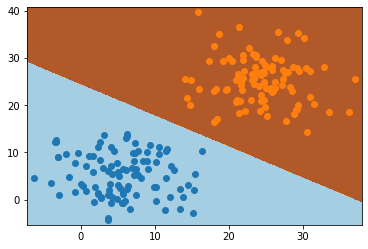

In [8]:
# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df1_classifier.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y1 == class_value)
    # create scatter of these samples
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap='Paired')

***Dataset 2 - Logistic Regression***

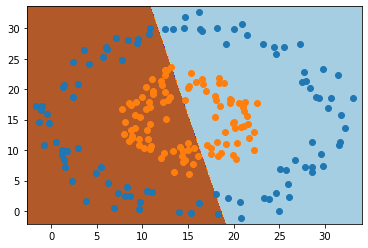

In [9]:
# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df2_classifier.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y2 == class_value)
    # create scatter of these samples
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap='Paired')

***Dataset 1 - Gaussian Naive Bayes***

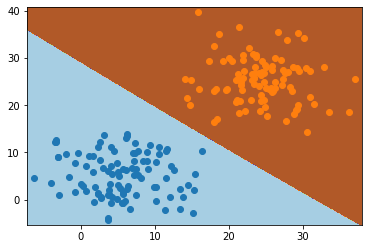

In [10]:
# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df1_GNB.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y1 == class_value)
    # create scatter of these samples
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap='Paired')

***Dataset 2 - Gaussian Naive Bayes***

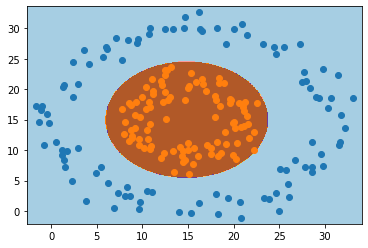

In [11]:
# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df2_GNB.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y2 == class_value)
    # create scatter of these samples
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap='Paired')

***Dataset 1 - K-Nearest Neighbor***

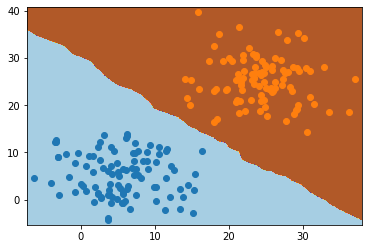

In [12]:
# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df1_neigh.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y1 == class_value)
    # create scatter of these samples
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap='Paired')

***Dataset 2 - K-Nearest Neighbor***

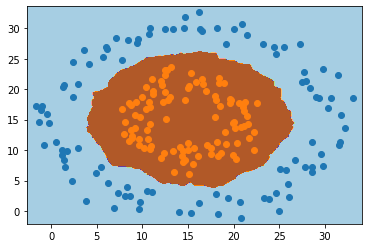

In [13]:
# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df2_neigh.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y2 == class_value)
    # create scatter of these samples
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap='Paired')

Gaussian Naive Bayes and KNN are able to fit a decision boundary such that it is circular whereas Logistic Regression can only fit a straight line decision boundary

# Question 8

In [15]:
X3 = df3.iloc[:, [0, 1]].values
Y3 = df3.iloc[:, 2].values

df3_classifier = LogisticRegression(random_state=0)
df3_classifier.fit(X3, Y3)
print(f'Number 8, Score using Logistic Regression for Dataset 3: {df3_classifier.score(X3, Y3)}')

df3_GNB = GaussianNB()
df3_GNB.fit(X3, Y3)
print(f'Number 8, score using Gaussian NB for dataset 3: {df3_GNB.score(X3, Y3)}')

K = math.floor(math.sqrt(len(df1)))
df3_neigh = KNeighborsClassifier(n_neighbors=K)
df3_neigh.fit(X3, Y3)
print(f'Number 8, score using KNN for dataset 3: {df3_neigh.score(X3, Y3)}')

Number 8, Score using Logistic Regression for Dataset 3: 0.87
Number 8, score using Gaussian NB for dataset 3: 0.885
Number 8, score using KNN for dataset 3: 1.0


***Dataset 3 - Logistic Regression***

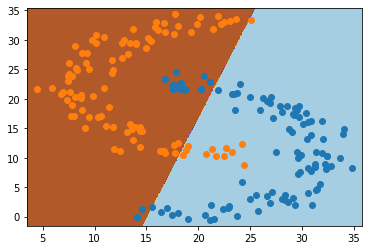

In [16]:
# define bounds of the domain
min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df3_classifier.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y3 == class_value)
    # create scatter of these samples
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap='Paired')

***Dataset 3 - Gaussian Naive Bayes***

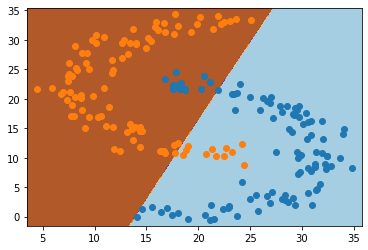

In [17]:
# define bounds of the domain
min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df3_GNB.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y3 == class_value)
    # create scatter of these samples
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap='Paired')

***Dataset 3 - K-Nearest Neighbor***

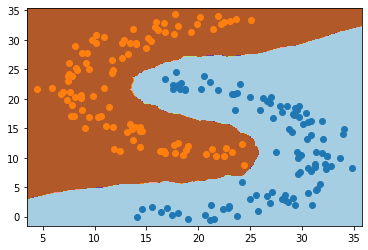

In [18]:
# define bounds of the domain
min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = df3_neigh.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(Y3 == class_value)
    # create scatter of these samples
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap='Paired')

KNN can fit a complex decision boundary such that it fits the datapoints well. Gaussian and Logistic both struggle to match the curvy relationship between the datapoints